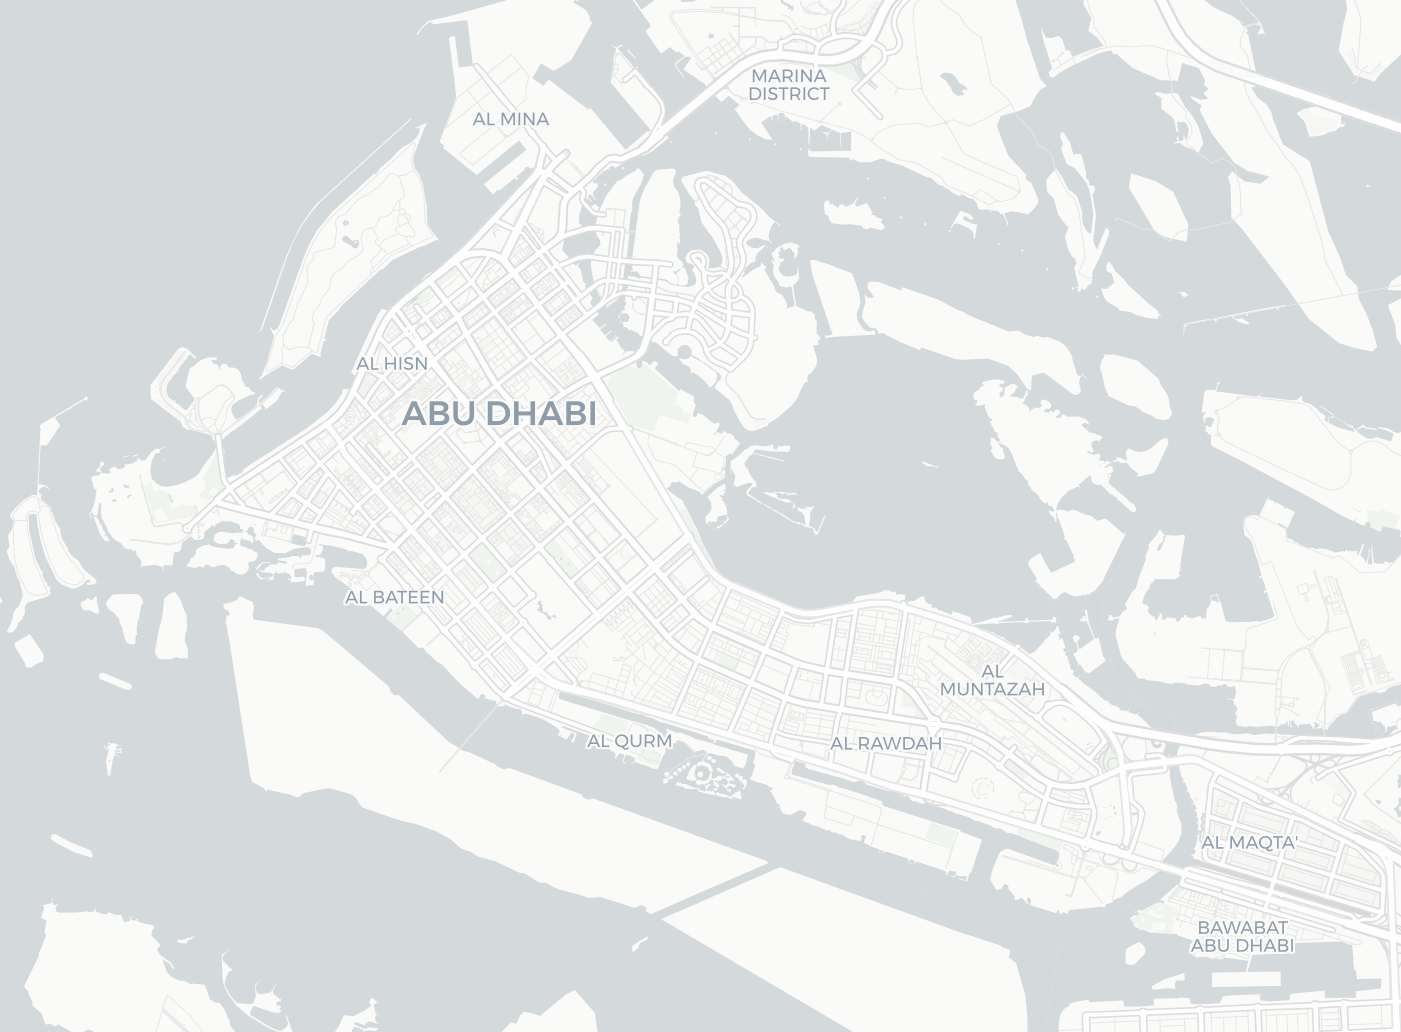

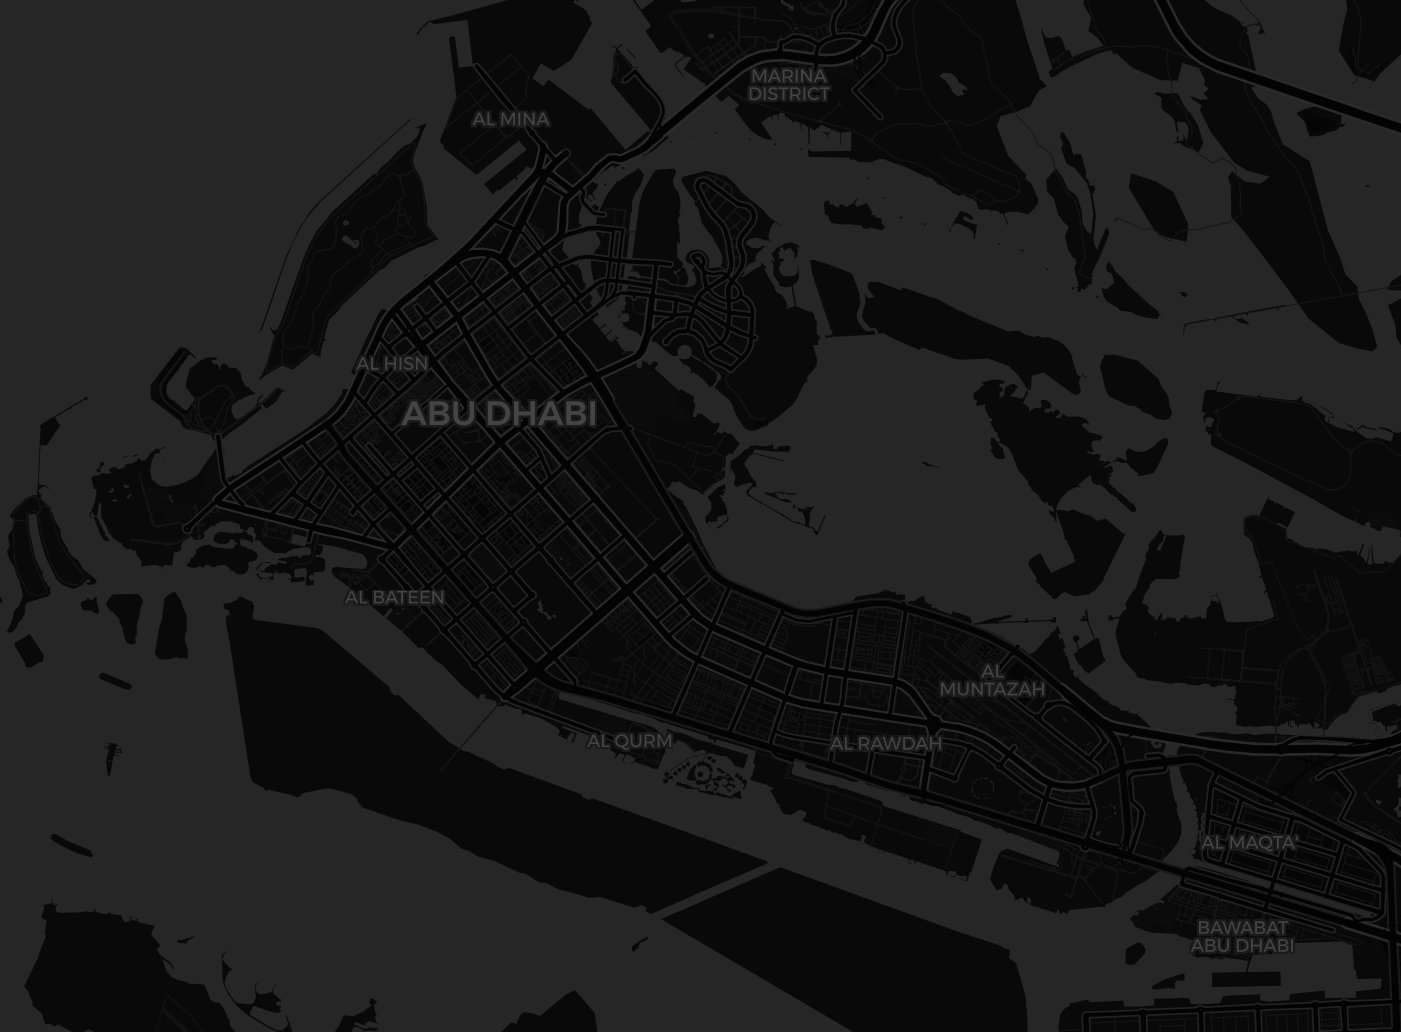

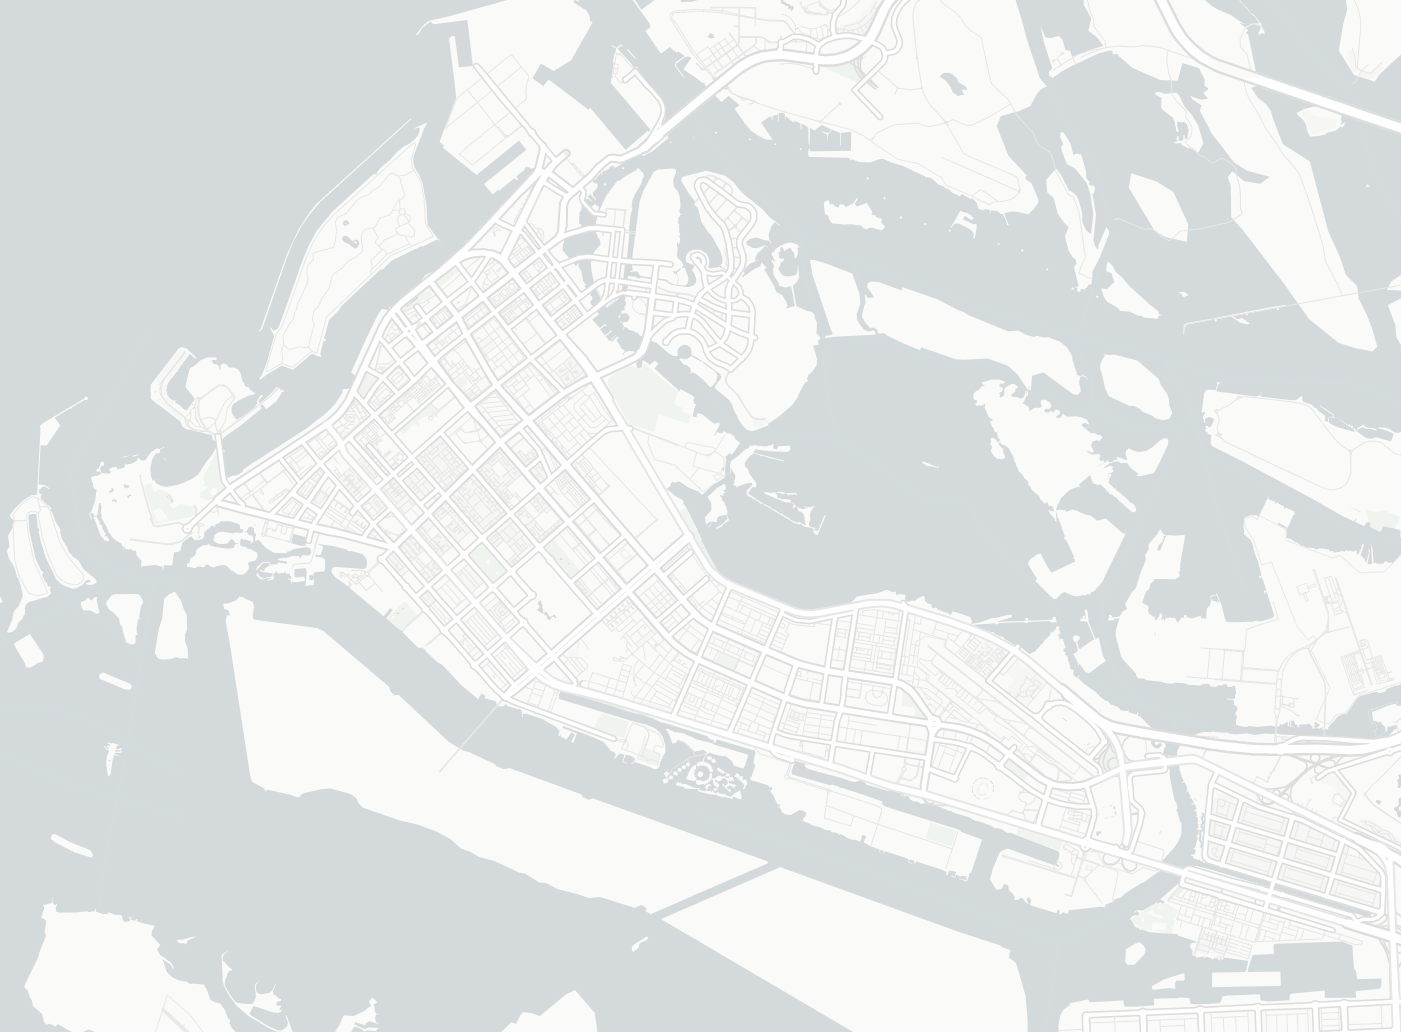

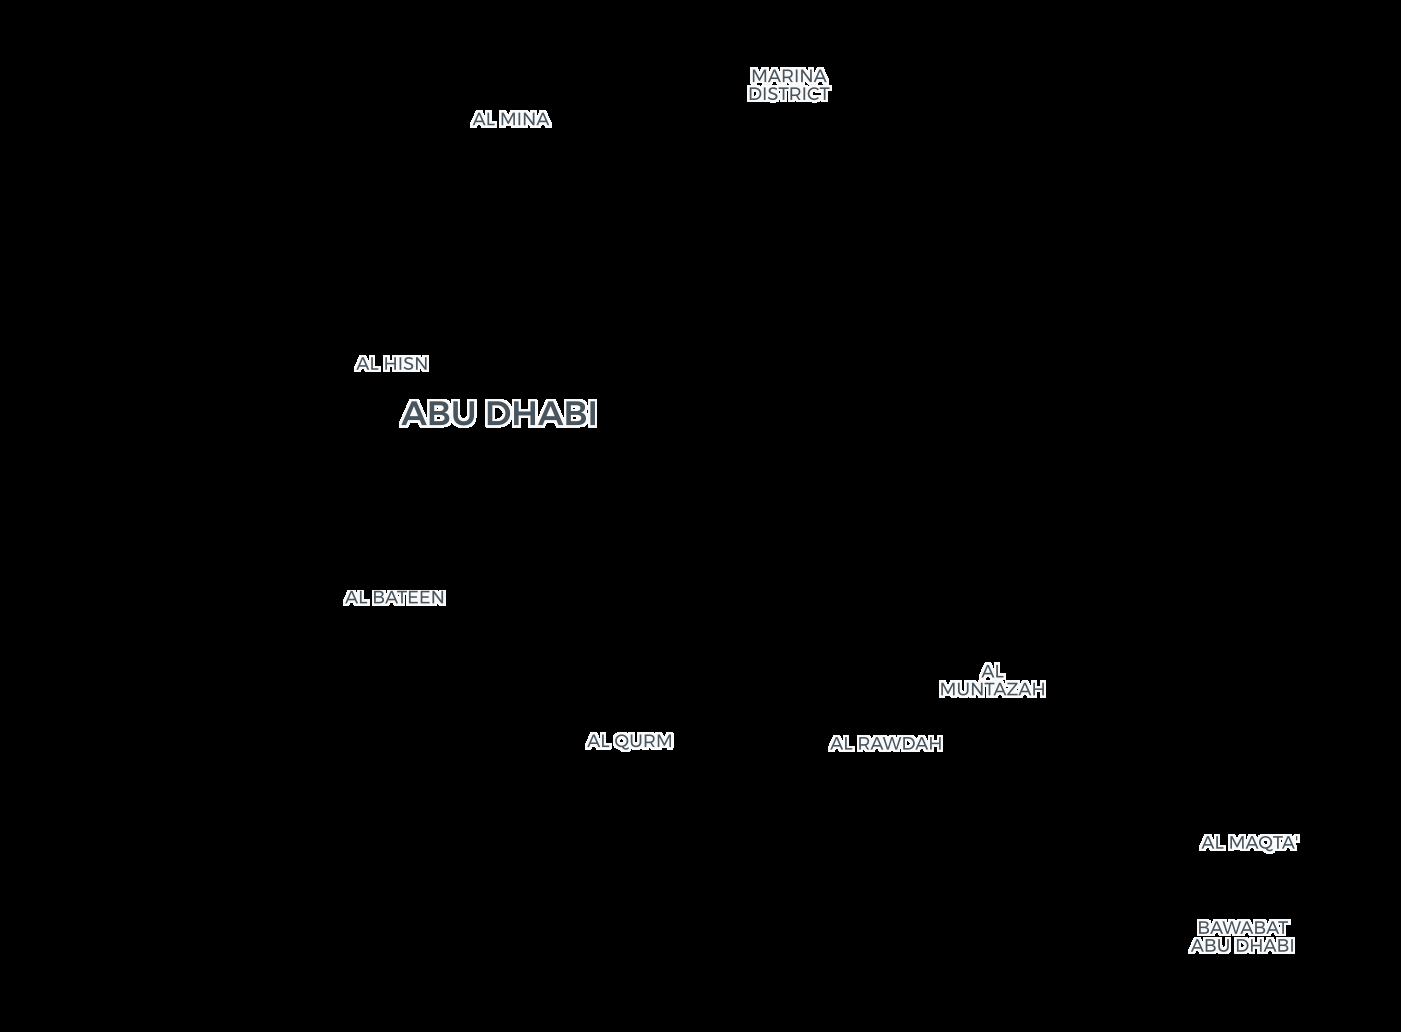

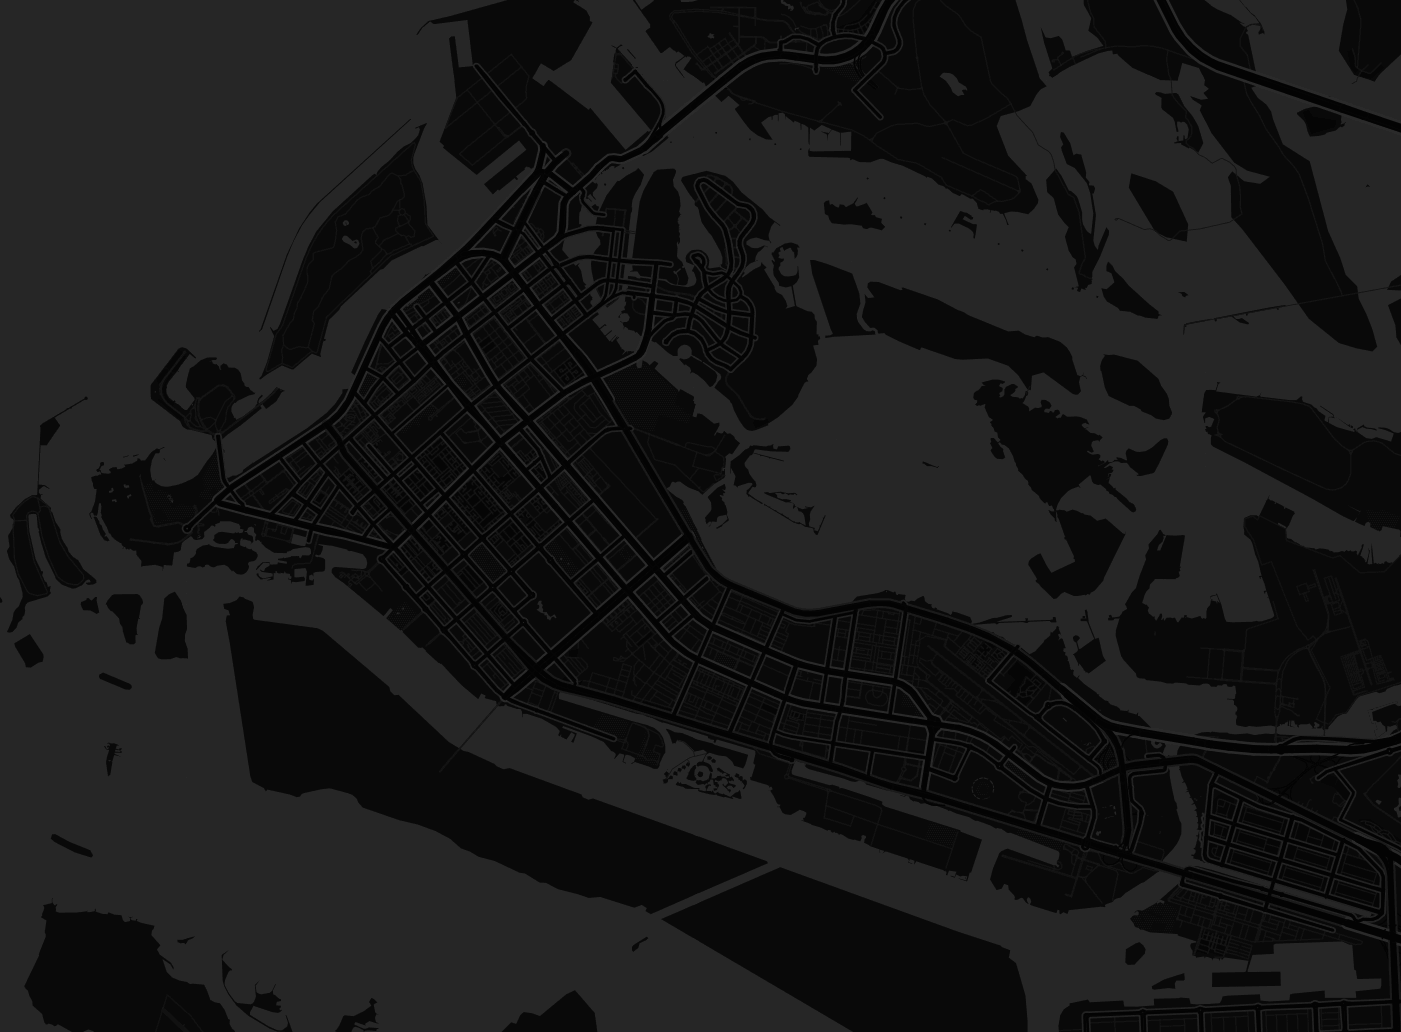

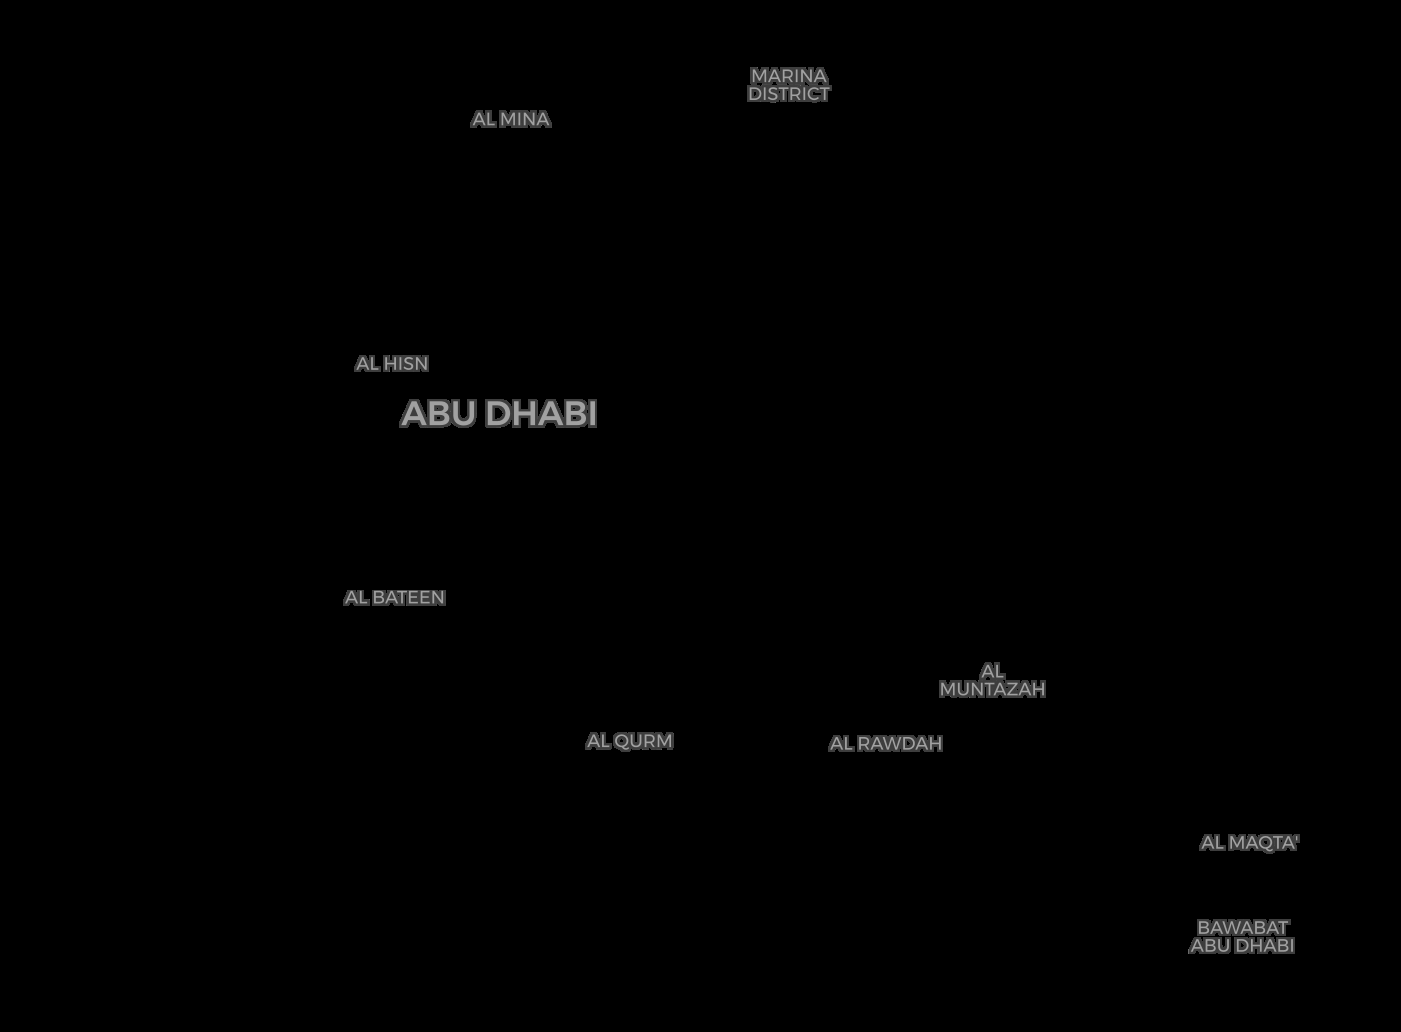

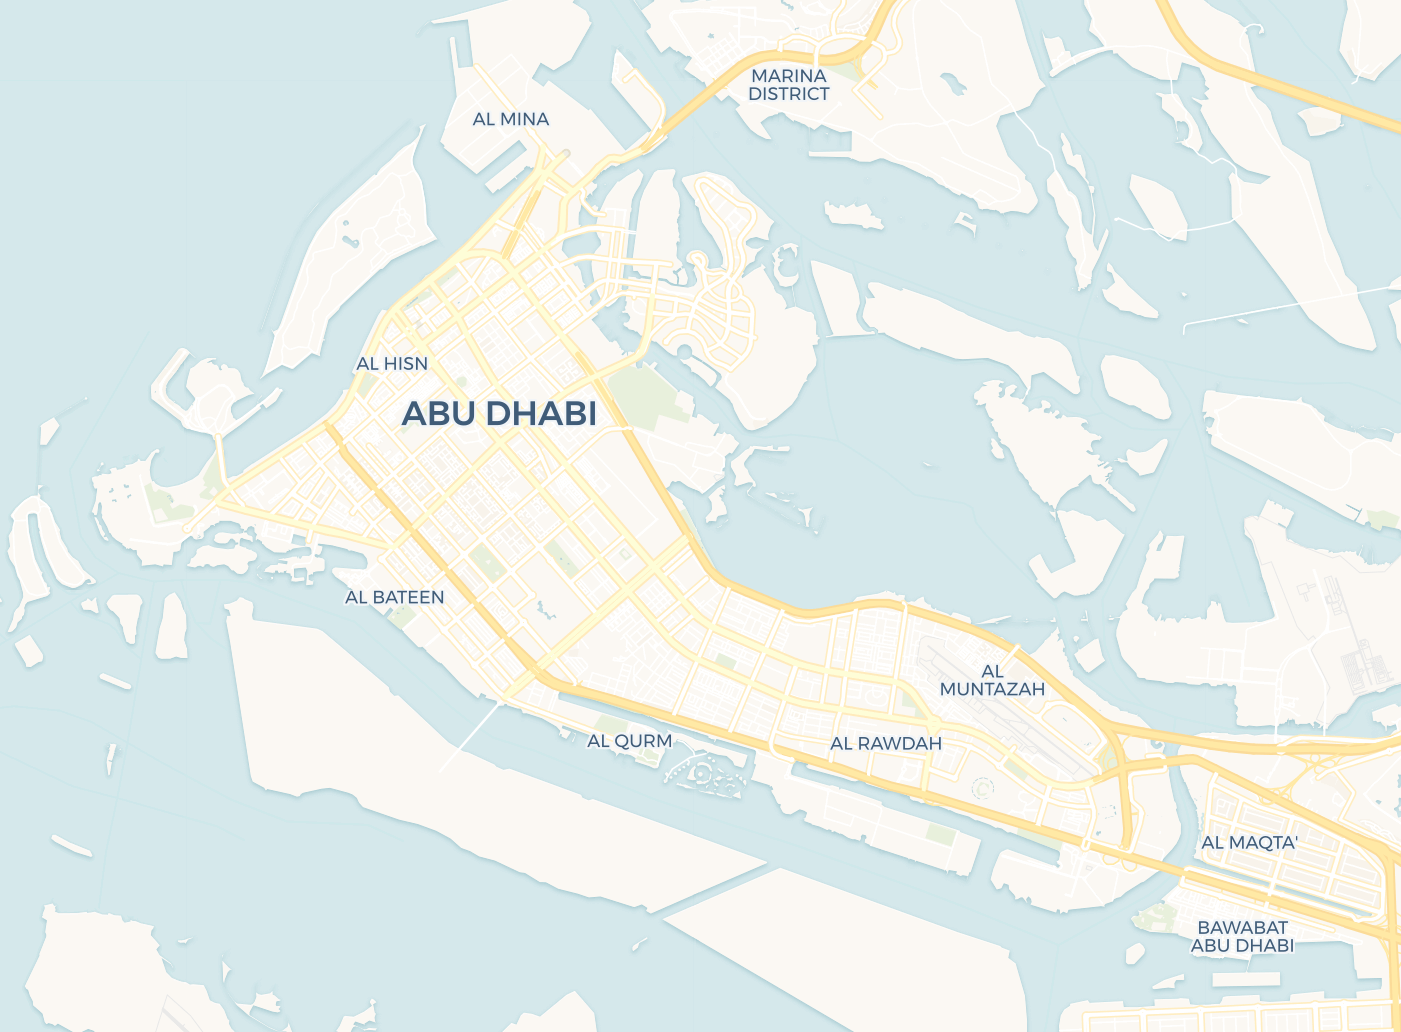

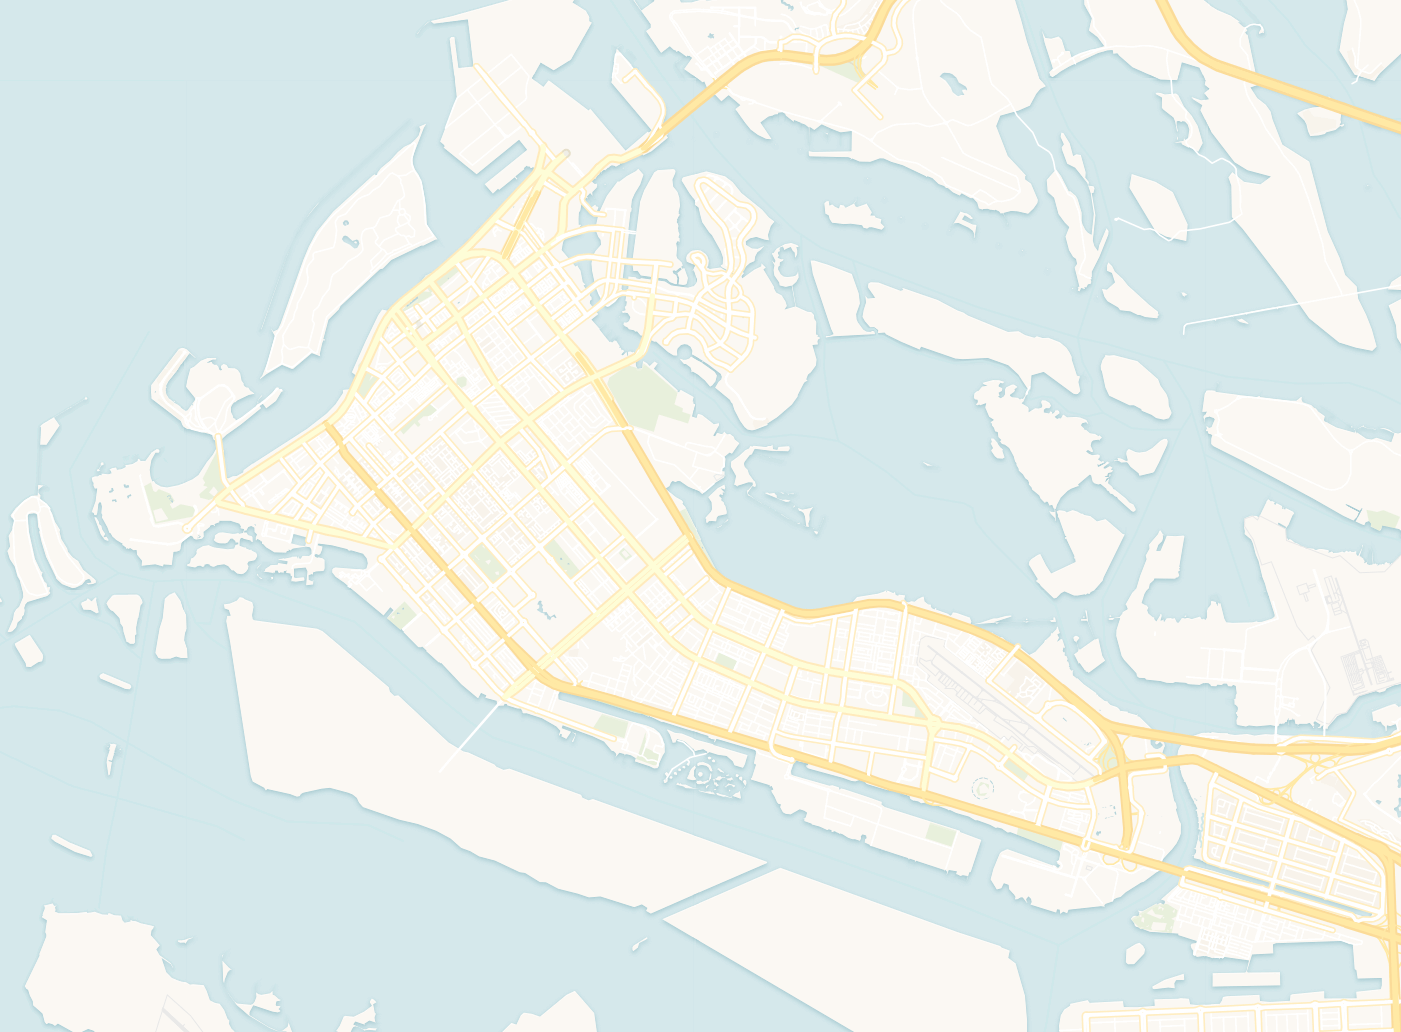

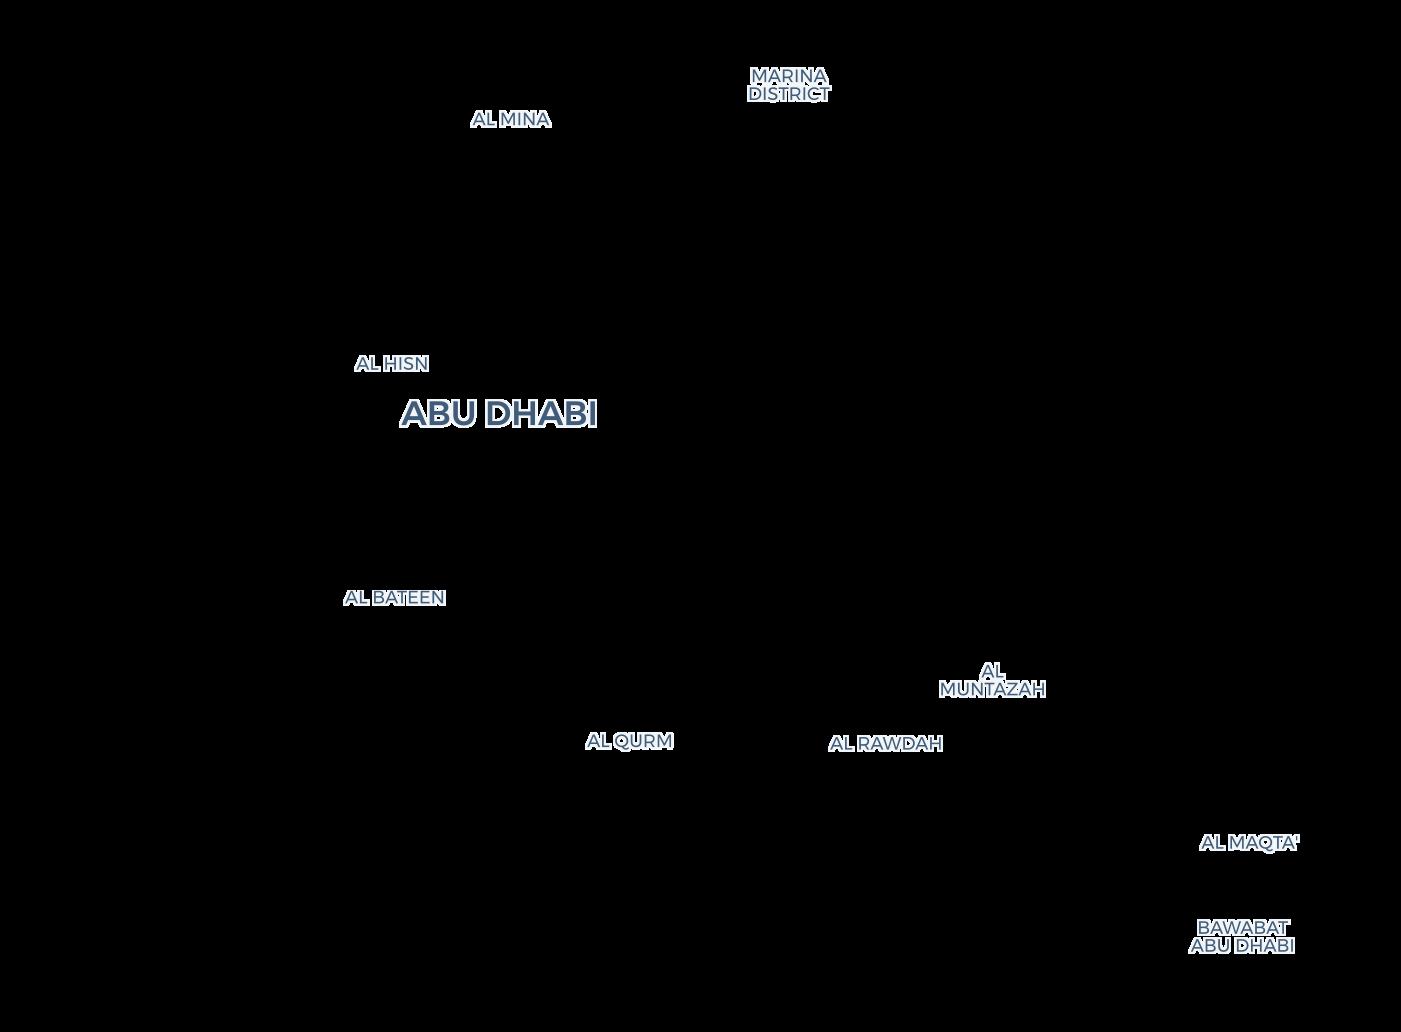

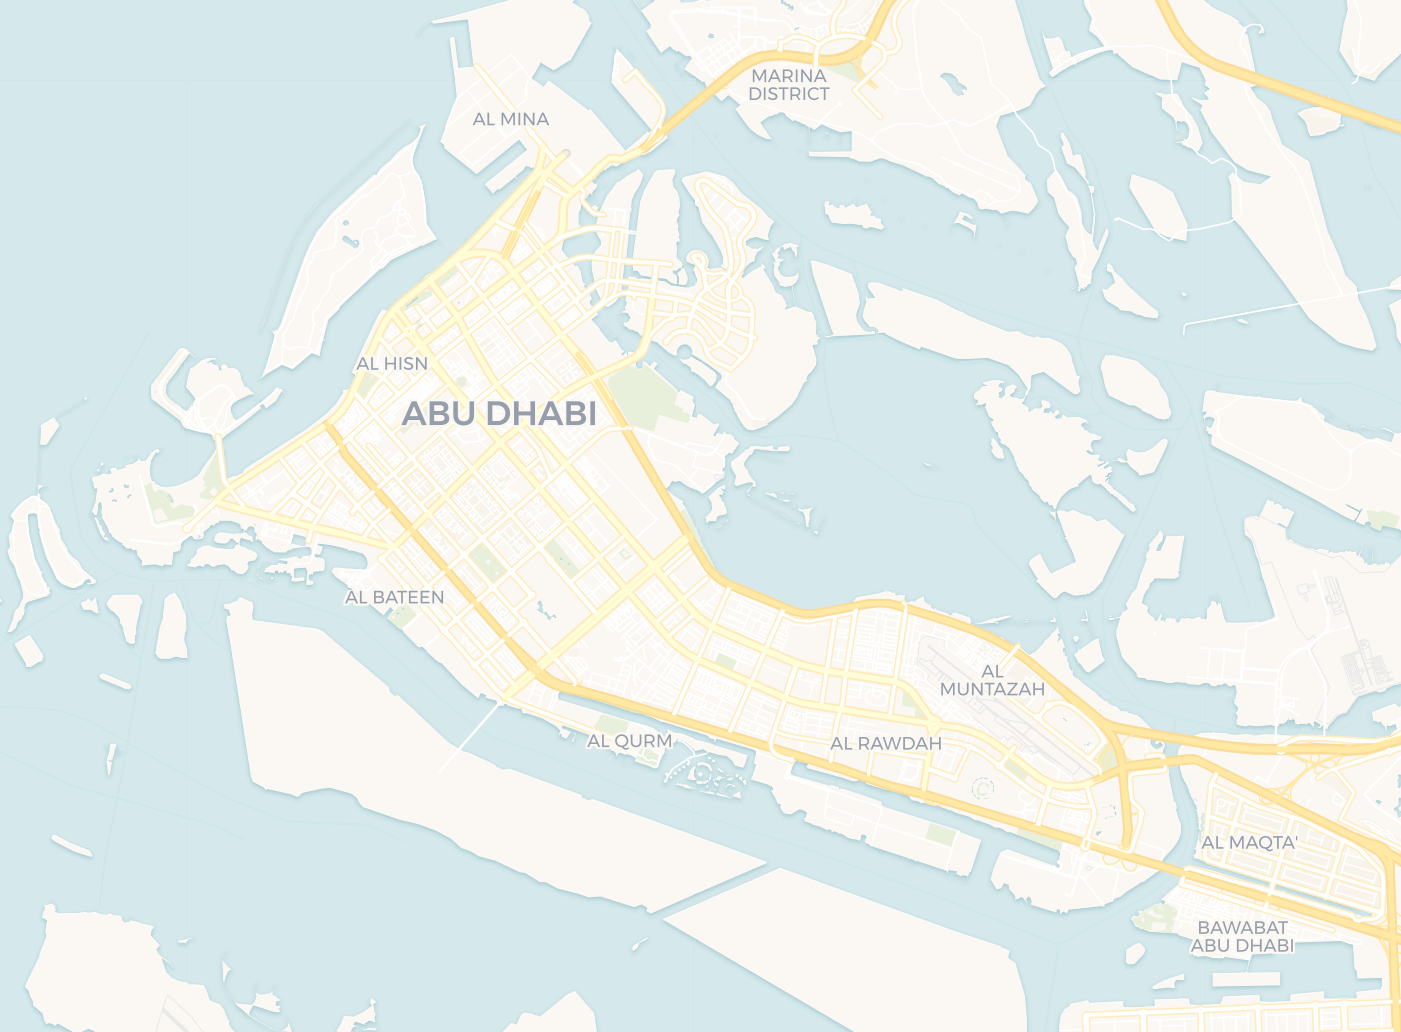

In [5]:
import smopy
# https://github.com/CartoDB/basemap-styles
# https://github.com/CartoDB/cartodb/wiki/BaseMaps-available
basemaps = ['light_all', 'dark_all', 'light_nolabels', 'light_only_labels', 'dark_nolabels', 'dark_only_labels',
            'rastertiles/voyager', 'rastertiles/voyager_nolabels', 'rastertiles/voyager_only_labels', 'rastertiles/voyager_labels_under']
mapbounds = {}
bounds = {"maxlat": 24.525846856349926,
          "maxlon": 54.50527388472162,
          "minlat": 24.391563843143523,
          "minlon": 54.30485116084661}
lonRange = abs(bounds['maxlon'] - bounds['minlon'])
latRange = abs(bounds['maxlat'] - bounds['minlat'])
mapbounds['minlon'] = bounds['minlon'] - lonRange * 0.1
mapbounds['maxlon'] = bounds['maxlon'] + lonRange * 0.1
mapbounds['minlat'] = bounds['minlat'] - latRange * 0.1
mapbounds['maxlat'] = bounds['maxlat'] + latRange * 0.1

s = 'c' # one of the available subdomains, either [a,b,c,d]
# {z} : Zoom level. We support from 0 to 20 zoom levels in OSM tiling system.
# {x},{y}: Tile coordinates in OSM tiling system
scale = '@2x' # OPTIONAL "@2x" for double resolution tiles

for style in basemaps:
    smopy.TILE_SERVER = f"https://{s}.basemaps.cartocdn.com/{style}/{{z}}/{{x}}/{{y}}{scale}.png"
    #smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}@2x.png"
    smopy.TILE_SIZE = 512
    map = smopy.Map((mapbounds['minlat'],mapbounds['minlon'],mapbounds['maxlat'],mapbounds['maxlon']), z=12, margin=0)
    x1, y1 = map.to_pixels(mapbounds['maxlat'],mapbounds['minlon'])
    x2, y2 = map.to_pixels(mapbounds['minlat'],mapbounds['maxlon'])
    img = map.img.crop((x1,y1,x2,y2))
    display(img)
